In [1]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_data import *
from plotting import *
from get_LrLx_data import *

# Get Data

In [2]:
source_df, obs_df, radio_df, xray_df = read_data("../DATA/SAX J1808.4-3658.txt")

SAX J1808.4-3658
Added 5% systematic uncertainty to the radio data.
X-ray uncertainty percentage:  68
Added 10.0% systematic uncertainty to the X-ray data.


In [3]:
obs_df

,name,xray_CI,xray_obs_ref,radio_obs_ref,extra_xray_text,extra_radio_text
0,SAX J1808.4-3658,68,[Gasealahwe et al. (in prep.) & ],[Gasealahwe et al. (in prep.) & ],NaN,NaN


In [4]:
radio_df.head()

,name,blockID,band,t_radio,dt_radio,Rphase,Rstate,Fr,Fr_unc,local_rms,alpha,alpha_unc,Fr_uplim_bool
0,SAX J1808.4-3658,1564594534,L,58695.74395,0.010367,NaN,HS,0.076017,0.025339,NaN,NaN,NaN,True
1,SAX J1808.4-3658,1564947058,L,58699.82428,0.010367,NaN,HS,0.117110,0.039037,NaN,NaN,NaN,True
2,SAX J1808.4-3658,1565459161,L,58705.81791,0.010366,decay,HS,0.589120,0.044809,NaN,NaN,NaN,False
3,SAX J1808.4-3658,1565987538,L,58711.91819,0.010366,decay,HS,0.364650,0.027636,NaN,NaN,NaN,False
4,SAX J1808.4-3658,1566574272,L,58718.70935,0.010366,decay,HS,0.113160,0.021141,NaN,NaN,NaN,False


In [5]:
xray_df.head(4)

,name,obsID,t_xray,dt_xray,Xphase,Xstate,Fx,Fx_unc_l,Fx_unc_u,model,fit_stat,Fx_uplim_bool
0,SAX J1808.4-3658,0033801024pc,58702.761574,0.012778,NaN,HS,2.045100e-11,2.666129e-12,2.821419e-12,powerlaw+bbodyrad,cstat,False
1,SAX J1808.4-3658,00033801025wt,58704.696458,0.011157,NaN,HS,4.640200e-10,4.713494e-11,4.716241e-11,powerlaw+bbodyrad,cstat,False
2,SAX J1808.4-3658,00030034130wt,58708.472708,0.004491,peak/trough,HS,6.396200e-10,6.588122e-11,6.595204e-11,powerlaw+bbodyrad,cstat,False
3,SAX J1808.4-3658,00030034131wt,58710.397083,0.004352,decay,HS,5.558400e-10,5.759041e-11,5.769583e-11,powerlaw+bbodyrad,cstat,False


# Light Curves

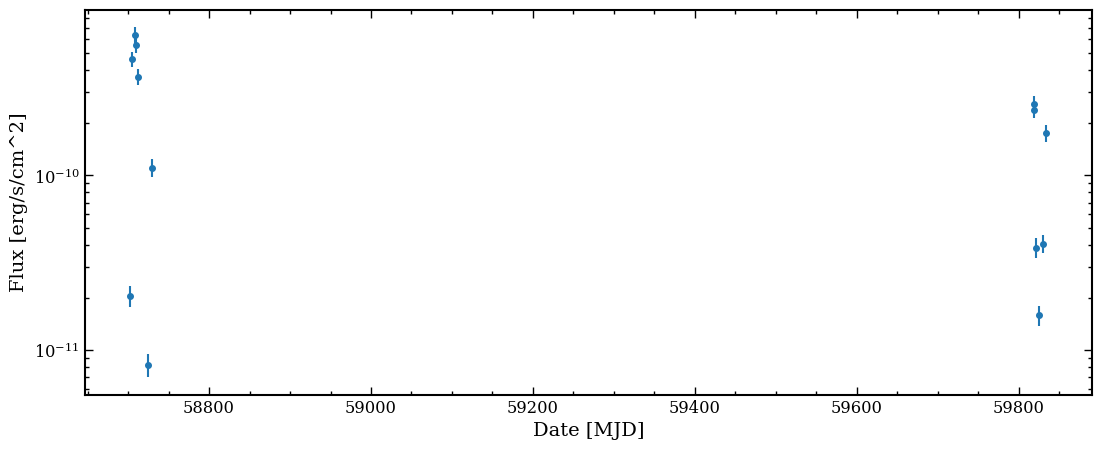

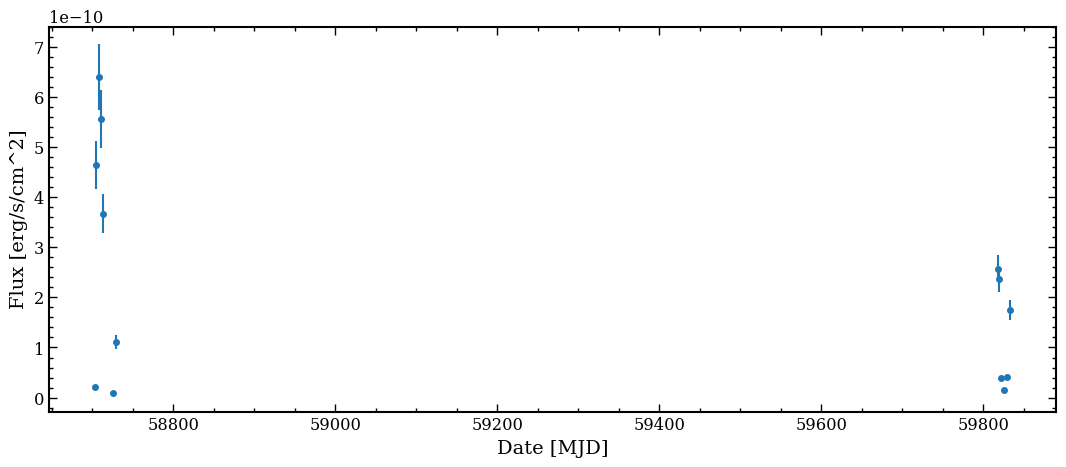

In [6]:
# WITH systematic errors
plot_xray_lightcurve(xray_df)

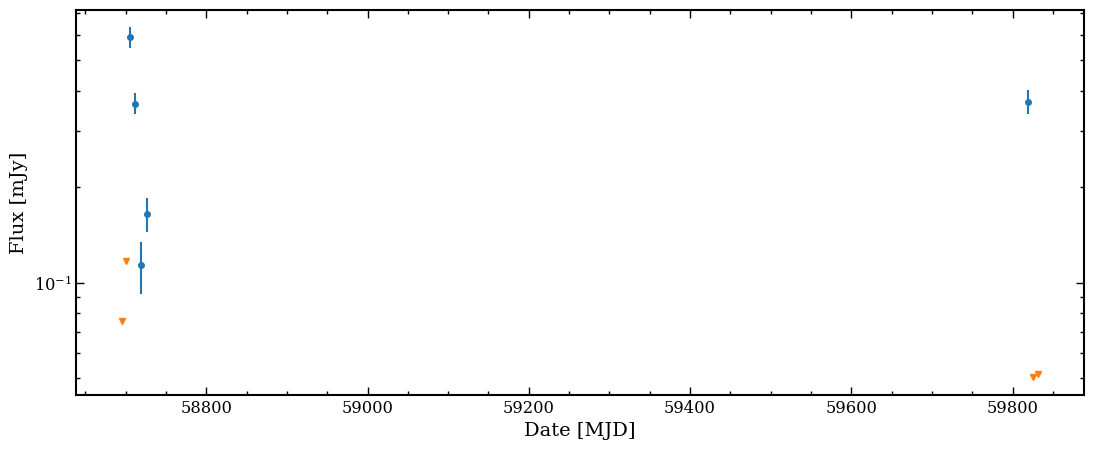

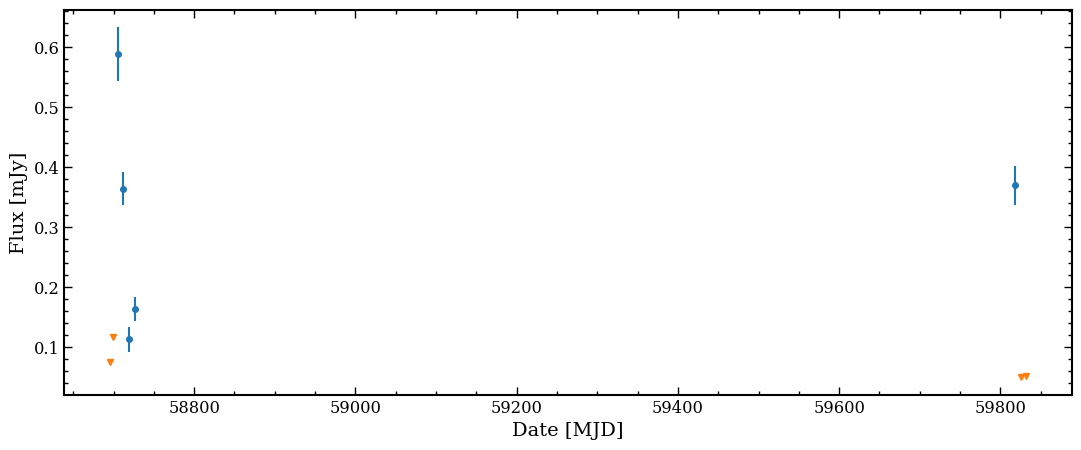

In [7]:
# WITH systematic error
plot_radio_lightcurve(radio_df)

# Pairing

In [8]:
paired_data = make_paired_Lr_Lx_df(radio_df, xray_df, source_df)

t_radio             Fr [mJy]            Fr_unc [mJy]        #xray     Mean Fx [erg/cm^2/s]          Fx_unc_l[erg/cm^2/s]          Fx_unc_u[erg/cm^2/s]          Fr_uplim_bool  Fx_uplim_bool  state          
58711.918190000     0.36465             0.02764             1         3.67410e-10                   3.83414e-11                   3.84874e-11                   False          False          HS             
59818.664069000     0.37000             0.03191             2         2.45854e-10                   1.79101e-11                   1.79377e-11                   False          False          HS             
59825.647711000     0.05050             0.01683             1         1.58160e-11                   2.13511e-12                   2.18495e-12                   True           False          HS             
Converting to luminosity using d_kpc = 2.7


In [9]:
lr_all, lx_all, all_types = get_bahramian_data()

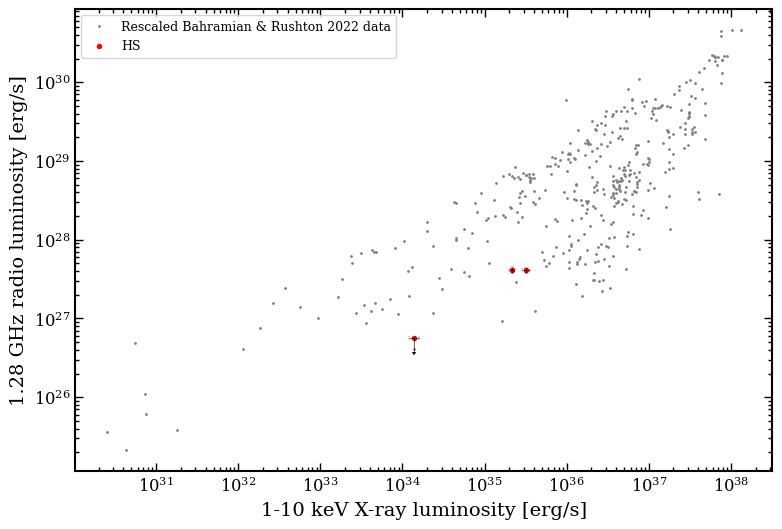

In [10]:
plot_Lr_Lx(paired_data, colourby="state", lx=lx_all, lr=lr_all)

# Interpolation

dt1, dt2:  3.0 10.0

Number of plotting points:  2262
Rejected based on distance: radio_MJD = 58695.74395; time_to_nearest: 7.017624000000069; time_to_furthest: 58695.74395
Rejected based on distance: radio_MJD = 58699.82428; time_to_nearest: 2.9372939999957453; time_to_furthest: 58699.82428
58705.81791: time_to_nearest: 1.1214519999994081 & time_to_furthest: 2.654798000003211; y_predict_err: 0.046946977292236625
58711.91819: time_to_nearest: 0.7356180000060704 & time_to_furthest: 1.5211069999932079; y_predict_err: 0.03775012366087083
58718.70935: time_to_nearest: 6.0555419999946025 & time_to_furthest: 6.365916000002471; y_predict_err: 0.0415048664409472
58726.79406: time_to_nearest: 1.7187940000003437 & time_to_furthest: 2.2221839999983786; y_predict_err: 0.04980876963081826
59818.664069: time_to_nearest: 0.48778399999719113 & time_to_furthest: 0.4981530000004568; y_predict_err: 0.03330849802559932
59825.647711: time_to_nearest: 0.3847189999942202 & time_to_furthest: 4.201363000000128

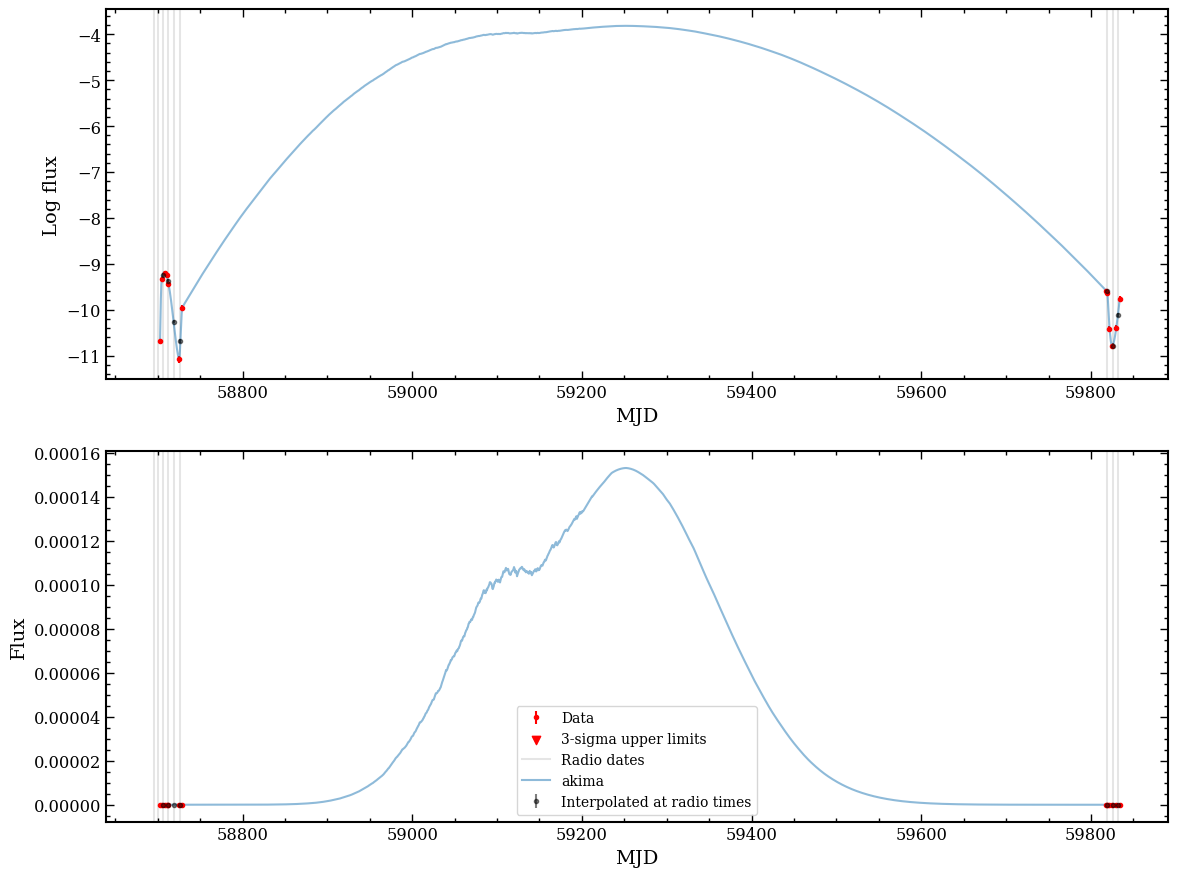

Number of used interpolated data points:  7
Converting to luminosity using d_kpc = 2.7


In [11]:
interpolated_data = make_interpolated_Lr_Lx_df(radio_df, xray_df, source_df, plotly=True)

In [15]:
interpolated_data[["t", "Lx", "Lr", "state"]]

,t,Lx,Lr,state
0,58705.817910,4.979185e+35,6.578744e+27,HS
1,58711.918190,3.719955e+35,4.072072e+27,HS
2,58718.709350,4.800285e+34,1.263666e+27,HS
3,58726.794060,1.824282e+34,1.832963e+27,HS
4,59818.664069,2.189800e+35,4.131816e+27,HS
5,59825.647711,1.431555e+34,5.639370e+26,HS
6,59831.721025,6.585796e+34,5.784542e+26,HS


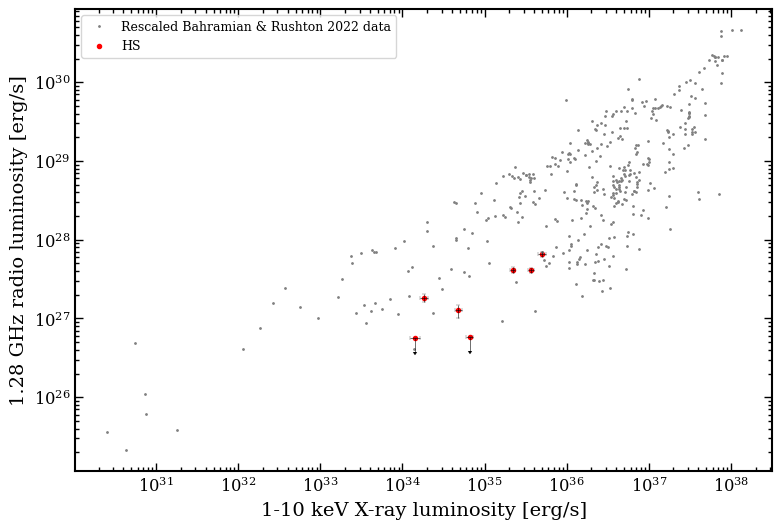

In [12]:
plot_Lr_Lx(interpolated_data, colourby="state", lx=lx_all, lr=lr_all)

In [13]:
plot_Lr_Lx_plotly(interpolated_data, colourby="state")